# Courswork - Applied Data Science

## Introduction
Provide an overview of the problem and your proposed solution. Describe the problem in detail and read around to provide context to the problem

Problem: Can vocal patterns be used identify individuals with Parkinson's disease

Description of Parkinsons: how many people it affects, symptoms

How the problem is solved: what model is used, notable characteristics in vocal patterns

### Imported Libraries
Import the libraries that shall be used throughout this notebook

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Model Evaluation
from sklearn.decomposition import PCA

## Data Description and Exploratory Analysis

 

<u>Data Set information:</u> 

The data is collected from 31 people, with 23 of them having Parkinson's disease. The data itself is made up of quantified measurements of vocal patterns from 197 voice recordings. 

The csv file does not contain any titles for the columns, so these will need to be added for easier reference later when manipulating the data. Here is a short description of each:

1. MDVP:Fo(Hz) = Average vocal fundamental frequency
2. MDVP:Fhi(Hz) = Maximum vocal fundamental frequency
3. MDVP:Flo(Hz) = Minimum vocal fundamental frequency
4. MDVP:Jitter(%) = measures of variation in fundamental frequency
5. MDVP:Jitter(Abs) = measures of variation in fundamental frequency
6. MDVP:RAP = measures of variation in fundamental frequency
7. MDVP:PPQ = measures of variation in fundamental frequency
8. Jitter:DDP = measures of variation in fundamental frequency
9. MDVP:Shimmer = measures of variation in amplitude
10. MDVP:Shimmer(dB) = measures of variation in amplitude
11. Shimmer:APQ3 = measures of variation in amplitude
12. Shimmer:APQ5 = measures of variation in amplitude
13. MDVP:APQ = measures of variation in amplitude
14. Shimmer:DDA = measures of variation in amplitude
15. NHR  = measures of ratio of noise to tonal components in the voice
16. HNR  = measures of ratio of noise to tonal components in the voice
17. Target = Health status of the subject: 1 - Parkinson's, 0 - healthy
18. RPDE  = nonlinear dynamical complexity measures
19. D2  = nonlinear dynamical complexity measures
20. DFA	 = Signal fractal scaling exponent
21. spread1 = nonlinear measures of fundamental frequency variation
22. spread2	 = nonlinear measures of fundamental frequency variation
23. PPE = nonlinear measures of fundamental frequency variation

The data will also be separated at this point into features and labels (of which there is only one, 'Target') to be referred to later on.

In [2]:

# Read data into data frame
parkinsons_frame = pd.read_csv("parkinsons.csv")

# Add column titles 
parkinsons_frame.columns = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)",
                           "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)",
                           "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR",
                            "HNR", "Target", "RPDE", "D2", "DFA", 
                            "spread1", "spread2", "PPE"]

# Splitting the data into feature frame and label frame
feature_frame = parkinsons_frame.drop(['Target'], axis=1)
label_frame = parkinsons_frame['Target']


147 (75.26%) of the voice recordings are from those with Parkinson's, and the remaining 50 (24.74%) are from the 8 healthy individuals. This is visualised in the below pie chart:

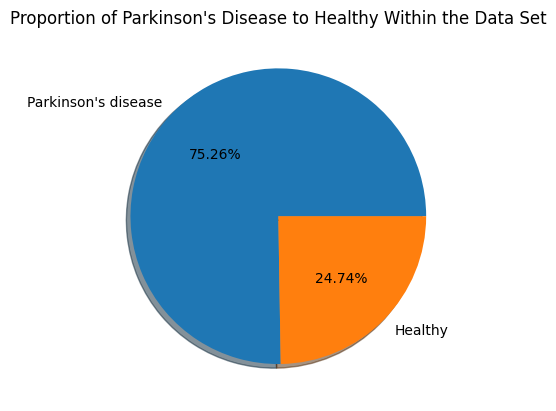

In [3]:
plt.pie(label_frame.value_counts(),
        labels=["Parkinson's disease", "Healthy"],
        autopct="%.2f%%",
        shadow=True)
plt.title("Proportion of Parkinson's Disease to Healthy Within the Data Set")
plt.show()

### Visualisation


#### Basic Exploration

According to Parkinson's UK, Parkinson's disease can affect a person's speech in a number of notable ways, such as being unable to speak loud enough, pronouce words clearly or using the right tone of voice.

Below is an exploration of the measures of variation in amplitude:


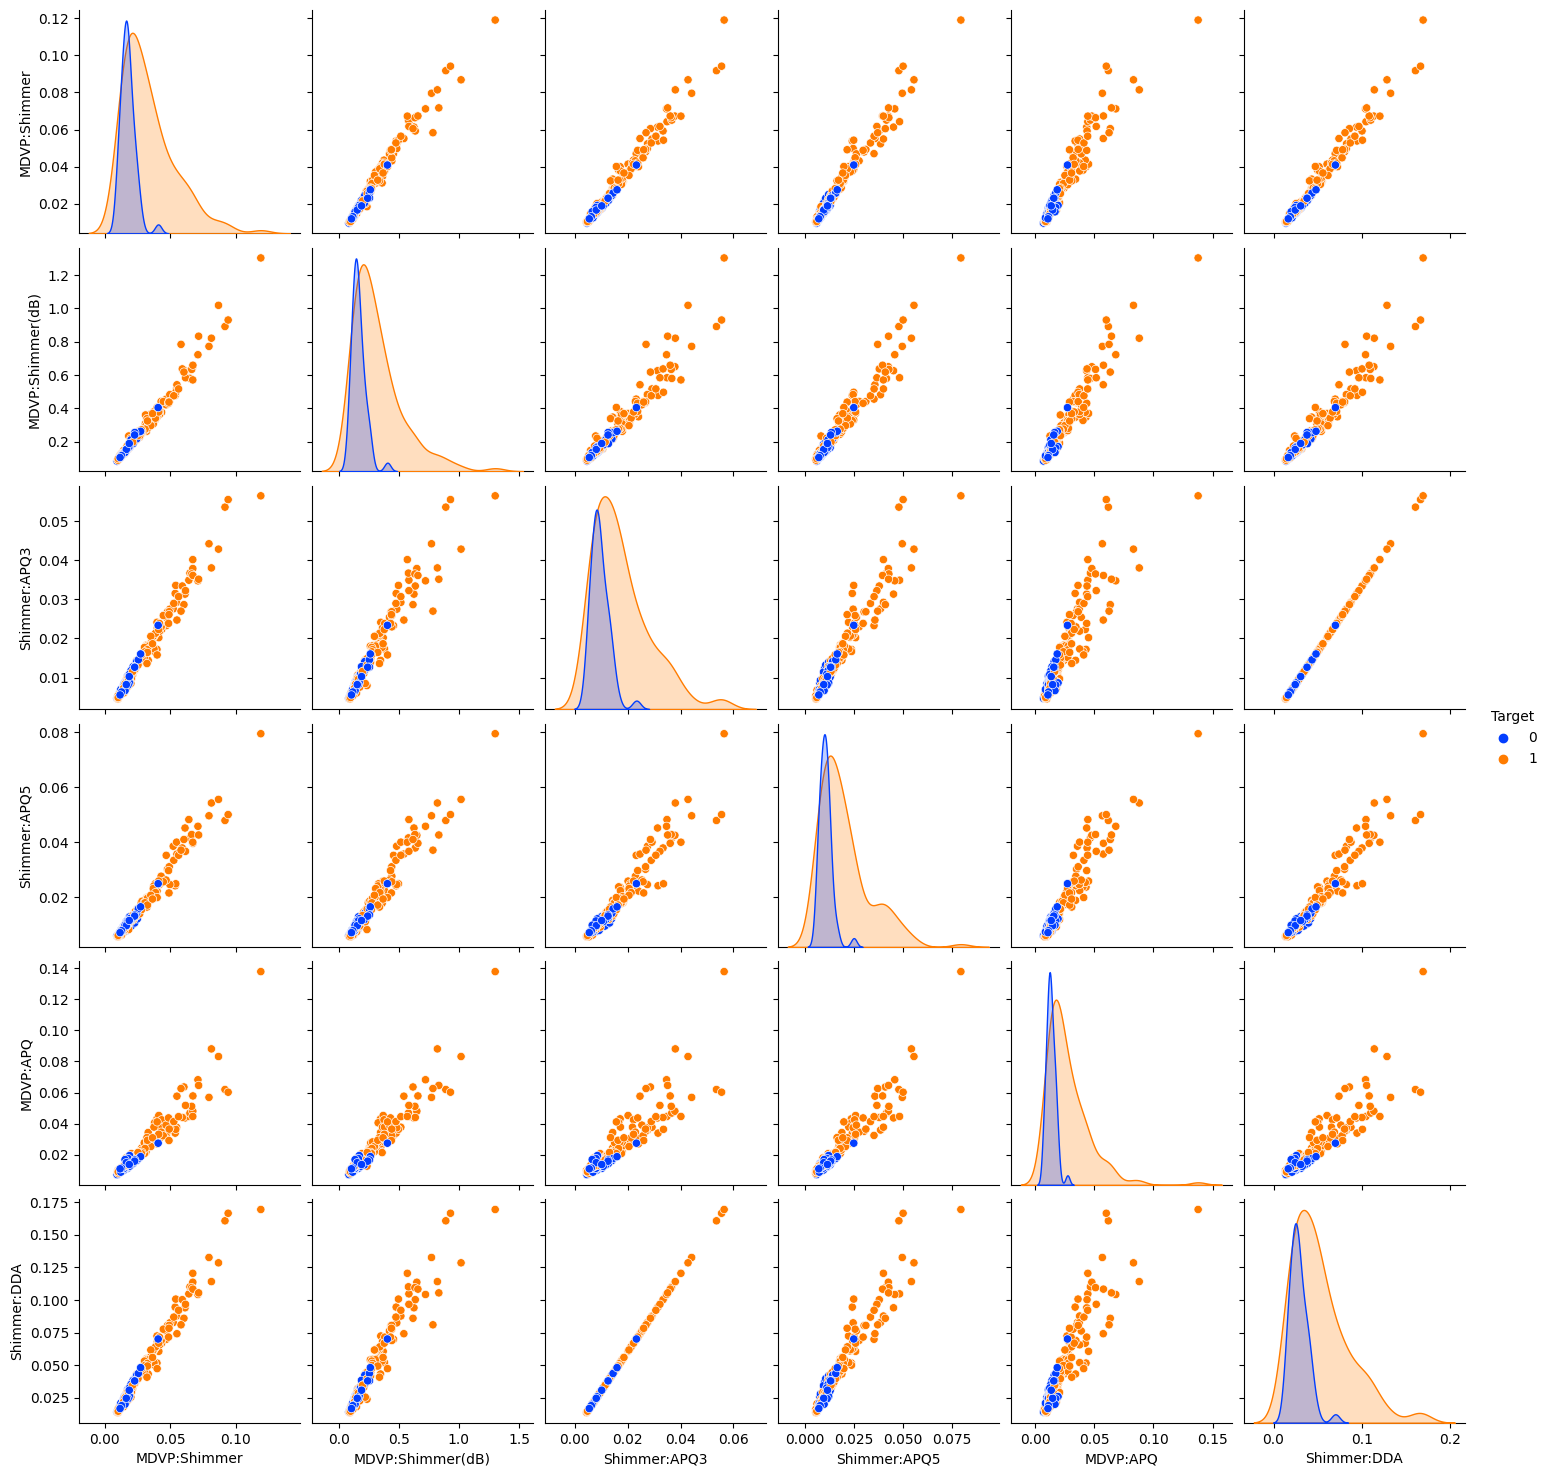

In [4]:
amplitude_frame = parkinsons_frame[["MDVP:Shimmer", "MDVP:Shimmer(dB)", 
                                   "Shimmer:APQ3", "Shimmer:APQ5",
                                   "MDVP:APQ", "Shimmer:DDA", "Target"]]
sns.pairplot(amplitude_frame,
             hue="Target",
             palette=sns.color_palette("bright", 2))
plt.show()

#### Principal Component Analysis

Principal Component Analysis is used to reduce the dimensionality of the data as 22 attributes will be hard to visualise. 

For example, a scatter matrix of the features could be possible, but it would take a while to compute, and the individual graphs would be hard to discern. 

It's also not clear what the major differences are between the types of measurements collected. Many appear to measure the same thing, such as variation in amplitude. Some are even the same but record different units, like percentage or dB.

Principal Component Analysis will reduce the dimensions while still capturing most of the variance of the original data. In the following, a scatter graph is made from the first two principal components of the data, which captures about 70% of the variance. 

In [13]:
# Standardisation of data

standardised_feature_frame = (feature_frame-feature_frame.mean())/feature_frame.std()

# PCA Model

pca_model = PCA()
pca_transformed_parkinsons = pca_model.fit_transform(standardised_feature_frame)


Below, the variance ratio is explained, demonstrating that the first two principal components (especially the first) capture the greatest variance.

The graph illustrates that captured varience decreases exponentially with more principal components.

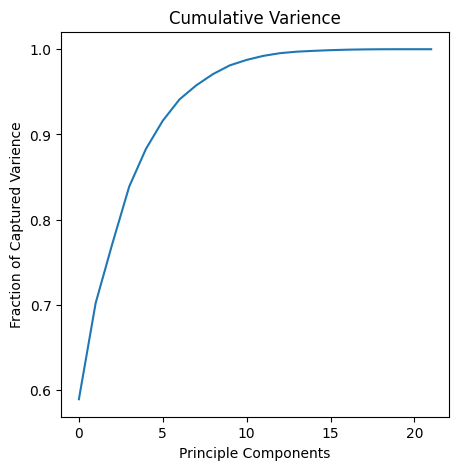

Variance captured by principal component 1 (58.917960%), 2 (11.291130%), 3 (7.005697%), 4 (6.664052%)


In [14]:

# Plotting graph of varience

plt.figure(figsize=(5,5)) 
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.ylabel("Fraction of Captured Varience")
plt.xlabel("Principle Components")
plt.title("Cumulative Varience")
plt.show()

# Captured variance from the first 4 components
output = "Variance captured by principal component 1 ({:%}), 2 ({:%}), 3 ({:%}), 4 ({:%})" 
print(output.format(pca_model.explained_variance_ratio_[0], 
      pca_model.explained_variance_ratio_[1],
      pca_model.explained_variance_ratio_[2],
      pca_model.explained_variance_ratio_[3]))



Using the first 11 principle components would capture 99.53% of the varience in the data. However, 11 components is also hard to visualise. Therefore, the below graph only uses the first 2 components, capturing about 70.20%.

<Figure size 640x480 with 0 Axes>

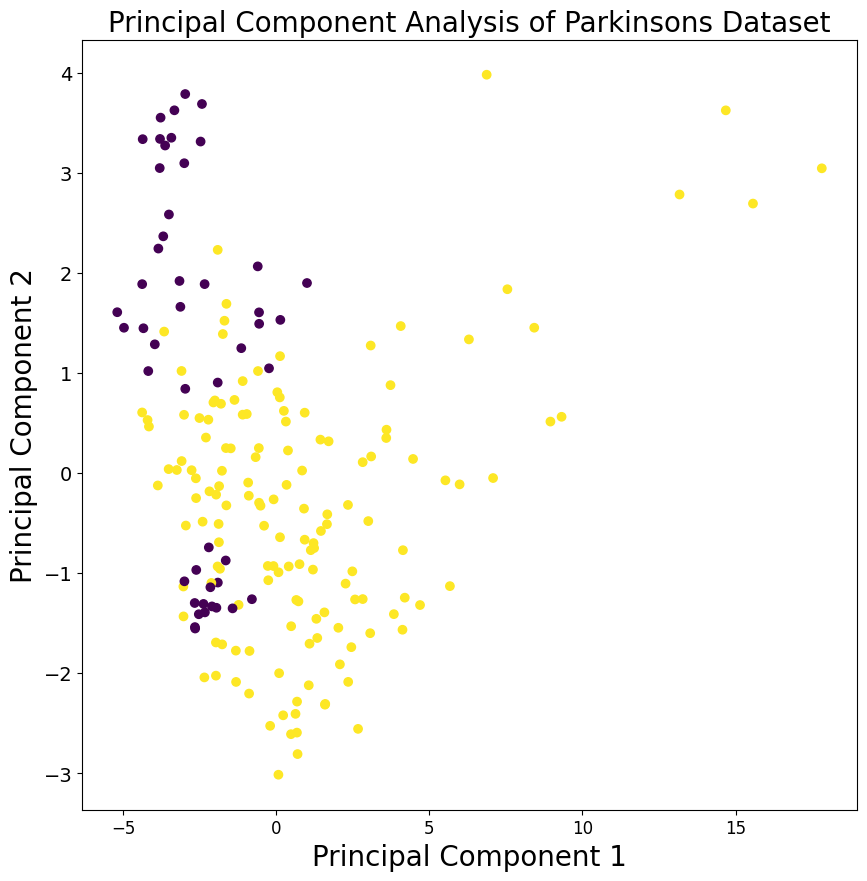

In [15]:
# Creating a PCA model with only the first two compenents

pca_reduced_model = PCA(n_components=2)
pca_transformed_parkinsons = pca_reduced_model.fit_transform(standardised_feature_frame)

pca_data_frame = pd.DataFrame(data = pca_transformed_parkinsons, columns = ['PC1','PC2'])

# PCA visualisation

plt.figure()
plt.figure(figsize = (10,10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('Principal Component 1', fontsize = 20)
plt.ylabel('Principal Component 2', fontsize = 20)
plt.title("Principal Component Analysis of Parkinsons Dataset", fontsize = 20)
plt.scatter(pca_data_frame['PC1'], pca_data_frame['PC2'], c = label_frame)
plt.show()

             

<u>Analysis</u>

Looking at the graph, it can be seen that those with Parkinson's disease are much more spread out in principal component 1, but there are no distinct clusters that group the healthy and Parkinson's. In fact, some are very similar. An issue with the data is that these are not unique individuals. It could be that similar data points on the graph all come from the same person, with only minor deviations. Considering that only 8 healthy people took part, I would not consider this a large enough sample. Having more data on healthy individuals may have provided additional insight here.



## Build the Models
Describe, and implement, models to attept to solve the interesting questions asked of your chosen dataset. You are able to use of the techniques taught in the module and labs, though some may not be relevant

First, the dataset shall be split into a training frame and test frame for the models to use

In [20]:
from sklearn.model_selection import train_test_split

train_frame, test_frame = train_test_split(parkinsons_frame, 
                                           test_size=0.2,
                                           shuffle=True)

train_feature_frame = train_frame.drop(["Target"], axis=1)
train_label_frame = train_frame["Target"]

test_feature_frame = test_frame.drop(["Target"], axis=1)
test_label_frame = test_frame["Target"]

#### Decision Tree

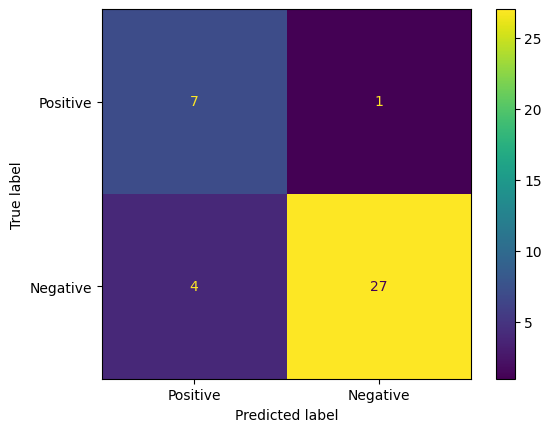

Decision Tree Accuracy: 0.8717948717948718


In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(train_feature_frame, 
                                  train_label_frame)

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
# report confusion matrix and accuracy
tree_predictions = decision_tree.predict(test_feature_frame)
cm = confusion_matrix(test_label_frame, tree_predictions)
accuracy = accuracy_score(test_label_frame, tree_predictions)


# visualise the confusion matrix with ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.show()

# what is the accuracy on the testing set?
print(f"Decision Tree Accuracy: {accuracy}")


#### K-Means Model for Clustering

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
scaler.fit(feature_frame)
feature_scaled = scaler.transform(feature_frame)


model = KMeans(n_clusters=2, init="random", n_init=1)
model = model.fit(feature_scaled)


# evaluate performance by printing the silhouette score

score = silhouette_score(feature_scaled, model.labels_)
print(f"Silouette Score: {score}")


Silouette Score: 0.3993782554571762


c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


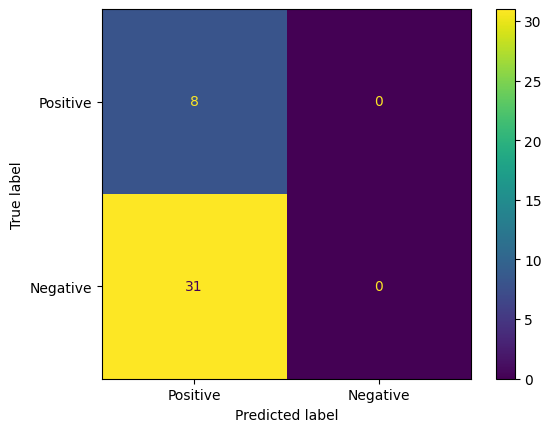

Clustering Model Accuracy: 0.20512820512820512


In [24]:
kmeans_predictions = model.predict(test_feature_frame)
cm = confusion_matrix(test_label_frame, kmeans_predictions)
accuracy = accuracy_score(test_label_frame, kmeans_predictions)


# visualise the confusion matrix with ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.show()

print(f"Clustering Model Accuracy: {accuracy}")

## Discussion of Results
Present your findings. This may be with plots or tables or results, whatever is suitable for your chosen method above

## Conclusion
Provide a brief summary of the results. Provide critical analysis; including shortcomings of the methods and how they might be improved

## References
Provide reference for any additional information you use, as required

Data From:
Little, M.A., McSharry, P.E., Roberts, S.J. et al. Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection. BioMed Eng OnLine 6, 23 (2007). https://doi.org/10.1186/1475-925X-6-23

https://www.nhs.uk/conditions/parkinsons-disease/

https://www.parkinsons.org.uk/information-and-support/speech-and-communication-problems